<a href="https://colab.research.google.com/github/diuval/Colab/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install keras-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 28.8 MB/s eta 0:00:00


In [44]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [45]:
import keras_core

Using PyTorch backend.


In [47]:
from tensorflow import keras

In [48]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [28]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

!unzip -qq kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   145M      0  0:00:05  0:00:05 --:--:--  148M


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!unzip -d /content/drive/MyDrive/Tarea_1 kagglecatsanddogs_5340.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5500.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5501.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5502.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5503.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5504.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5505.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5506.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5507.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5508.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5509.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/551.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5510.jpg  
  inflating: /content/drive/MyDrive/Tarea_1/PetImages/Dog/5511.jpg  
  inflating: /content/drive/MyDrive/Tarea_1

In [31]:
DATASET_PATH = "/content/drive/MyDrive/Tarea_1/PetImages"

In [32]:
import tensorflow as tf
import os

def filter_images():
    deleted_images = 0
    for folder_name in ("Cat", "Dog"):
        folder_path = os.path.join(DATASET_PATH, folder_name)
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            try:
                fobj = open(image_path, "rb")
                #Comprobamos si la imagen esta en JPEG
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            finally:
                fobj.close()
            if not is_jfif:
                deleted_images += 1
                #eliminamos la imagen correspondiente
                os.remove(image_path)
    print(f"Deleted {deleted_images} images")

In [33]:
filter_images()

Deleted 1561 images


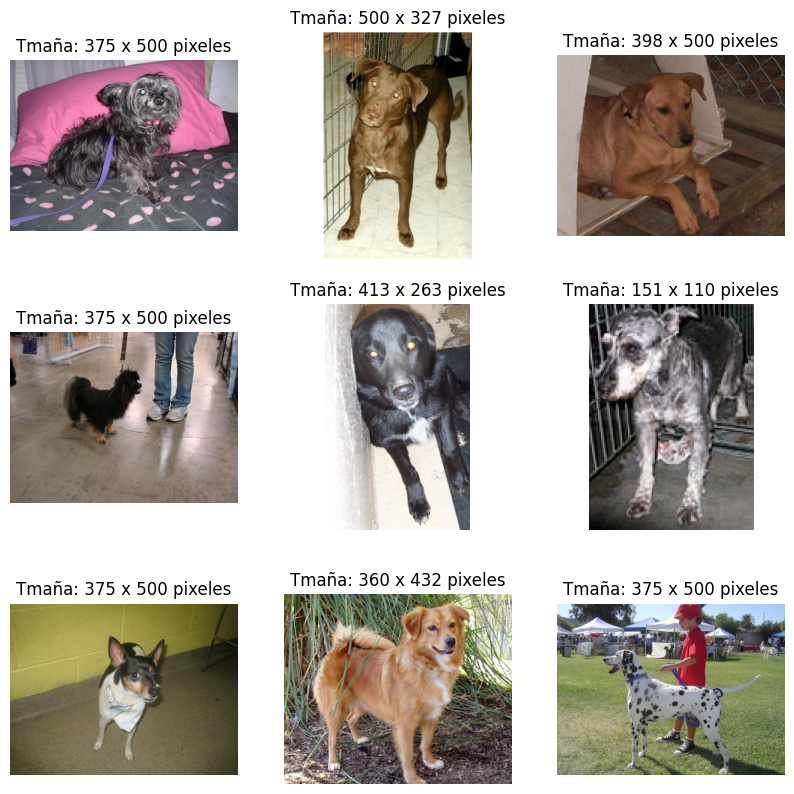

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

plt.figure(figsize=(10, 10))

folder_path = os.path.join(DATASET_PATH, "Dog")
for i, image in enumerate(os.listdir(folder_path)[:9]):
    image_path = os.path.join(folder_path, image)
    img = mpimg.imread(image_path)
    ax = plt.subplot(3, 3, i + 1) # (nrows, ncols, index)
    plt.imshow(img)
    plt.title(f"Tamaño: {img.shape[:2][0]} x {img.shape[:2][1]} pixeles")
    plt.axis("off")

plt.show()

In [49]:
image_size = (180, 180)
batch_size = 128 #Tamaño de lote

train_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23439 files belonging to 2 classes.
Using 18752 files for training.


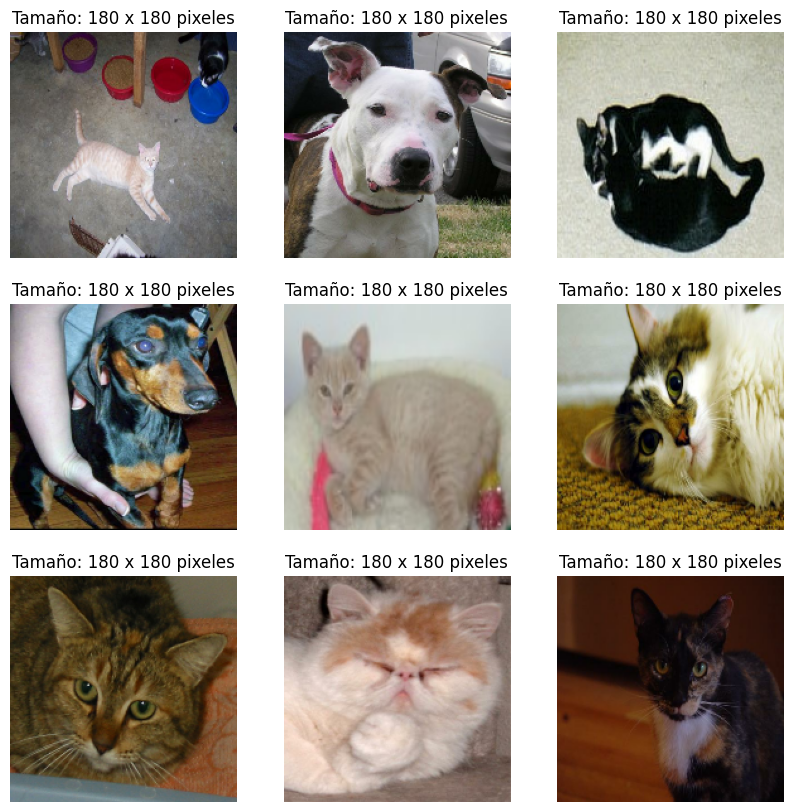

In [52]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1): #take(1) optiene un lote del conjunto de datos (128 ejemplos)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Tamaño: {images[i].shape[0]} x {images[i].shape[1]} pixeles")
        plt.axis("off")

plt.show()

In [54]:
len(train_ds)

147

In [55]:
batch1 = list(train_ds.take(1))
batch1

[(<tf.Tensor: shape=(128, 180, 180, 3), dtype=float32, numpy=
  array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           ...,
           [2.03666382e+01, 1.24666262e+01, 4.36662579e+00],
           [1.84200077e+01, 9.13999653e+00, 1.61998904e+00],
           [1.99066410e+01, 8.10664082e+00, 1.26665044e+00]],
  
          [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           ...,
           [1.78000355e+01, 1.59166441e+01, 1.18666630e+01],
           [1.83400154e+01, 1.37099953e+01, 1.04399967e+01],
           [1.71799812e+01, 1.17799816e+01, 8.66665077e+00]],
  
          [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 